# Communities¶
Community detection is the process of detection groups in a network. It is a NP problem, but there are some algorithms that provide the division with polynomic time.

## 1. Basics

Example: Zachary's Karate Club

1. Generate the Zachary's karate club (there is a funtion in netowrkx that generates it)
2. Plot it. Show the node id as labels.



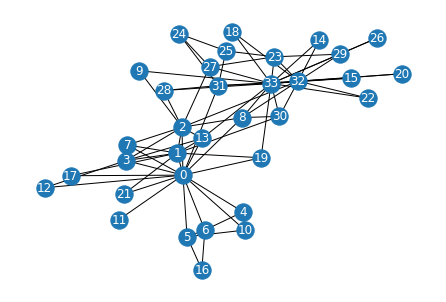

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# generate karate's club graph
G = nx.karate_club_graph()

# plot the graph
pos = nx.spring_layout(G)
nx.draw(G, pos=pos, with_labels=True, font_color="white")


## 2. Hierarchical clustering

Use the Girvan-Newman method available in networkx to obtain the communities for the Karate Club graph. Plot the graph using colors or shapes to identify each communities

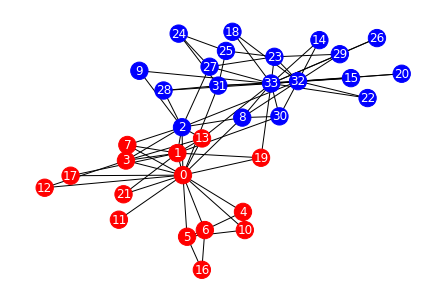

In [ ]:
import networkx.algorithms.community as nx_comm

# divide into communities
comp = nx_comm.girvan_newman(G)

# extract the groups
node_groups = tuple((sorted(c) for c in next(comp)))

# associate a color to each group
color_map = []
for node in G:
  color_map.append('red' if node in node_groups[0] else 'blue' )

# plot the graph with communities
nx.draw(G, node_color=color_map, pos=pos, with_labels=True, font_color="white")
plt.show()

Print the list of nodes in each community

In [ ]:
print('Hierarchical clustering')
print(node_groups)

Hierarchical clustering
([0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21], [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])


## 3. Modularity
Repeat the analysis with the modularity values obtained by the Lovain method (available in networkx). Plot the results obtained with all the methods and compare them. Recomendation: keep the same positions on the different graphs

[{0, 1, 2, 3, 7, 11, 12, 13, 17, 19, 21}, {16, 4, 5, 6, 10}, {32, 33, 8, 9, 14, 15, 18, 20, 22, 23, 26, 27, 29, 30}, {24, 25, 28, 31}]
{0: 0, 1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 6: 1, 7: 0, 8: 2, 9: 2, 10: 1, 11: 0, 12: 0, 13: 0, 14: 2, 15: 2, 16: 1, 17: 0, 18: 2, 19: 0, 20: 2, 21: 0, 22: 2, 23: 2, 24: 3, 25: 3, 26: 2, 27: 2, 28: 3, 29: 2, 30: 2, 31: 3, 32: 2, 33: 2}


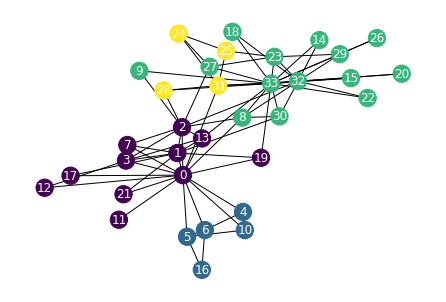

In [ ]:
import networkx.algorithms.community as nx_comm

# calculate the communities using modularity
partition = nx_comm.louvain_communities(G, seed=253)

# add the partition id as an attribute to the node
for id, c in enumerate(partition):
    for v in c:
        G.nodes[v]['comm'] = id
# to show the id for each node
# print(nx.get_node_attributes(G,'comm'))

# use partition id as node color
import matplotlib.cm as cm
cmap = cm.get_cmap('viridis', len(mod))
color = list(nx.get_node_attributes(G,'comm').values())

# plot th graph with the communities
nx.draw(G, node_color=color, cmap = cmap, pos=pos, with_labels=True, font_color="white")
plt.show()

Print the list of nodes in each community and compare it with the results of the hierarchical analysis. Are there differences?

In [ ]:
print(partition)

## 4. Communities in GoT books

Choose one of the networks that corresponds to one of the books of Game of Thrones and analyze the network. Study the degree distribution, the centrality measures (degree, betweenness, closeness and pagerank) and include a community analysis.

Describe the results: Which group represent each community? Who are the most relevant characters of these communities?

In [ ]:
#your code here